# Zero-Mean Chroma and Luma

In this notebook, we revisit the [chroma and luma](https://github.com/luctrudeau/CfL-Analysis/blob/master/notebooks/exploratory/0.01-luctrudeau-ChromaAndLuma.ipynb) experiment but with zero-mean values of chroma and luma.

In [1]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import load_paths
from src.data import make_kodim

import matplotlib.pyplot as plt
import numpy as np

[kodims, kodim_files] = make_kodim.load_kodim()

## Parameters for the experience

In [2]:
# Block size used to compare luma and chroma 
block_size = 32

# Image used
im = kodims[4]

## dY vs. dU

For each block in the image, we plot the zero-mean Y values along the zero-mean X axis and the U values along the Y axis. In [chroma and luma](https://github.com/luctrudeau/CfL-Analysis/blob/master/notebooks/exploratory/0.01-luctrudeau-ChromaAndLuma.ipynb) experiment, the x and y axis ranged from 0 to 255. For this experiment the value are zero-mean, so we use custom-sized axis. We can better see the distribution, however the distance between the samples is not uniform across plots.

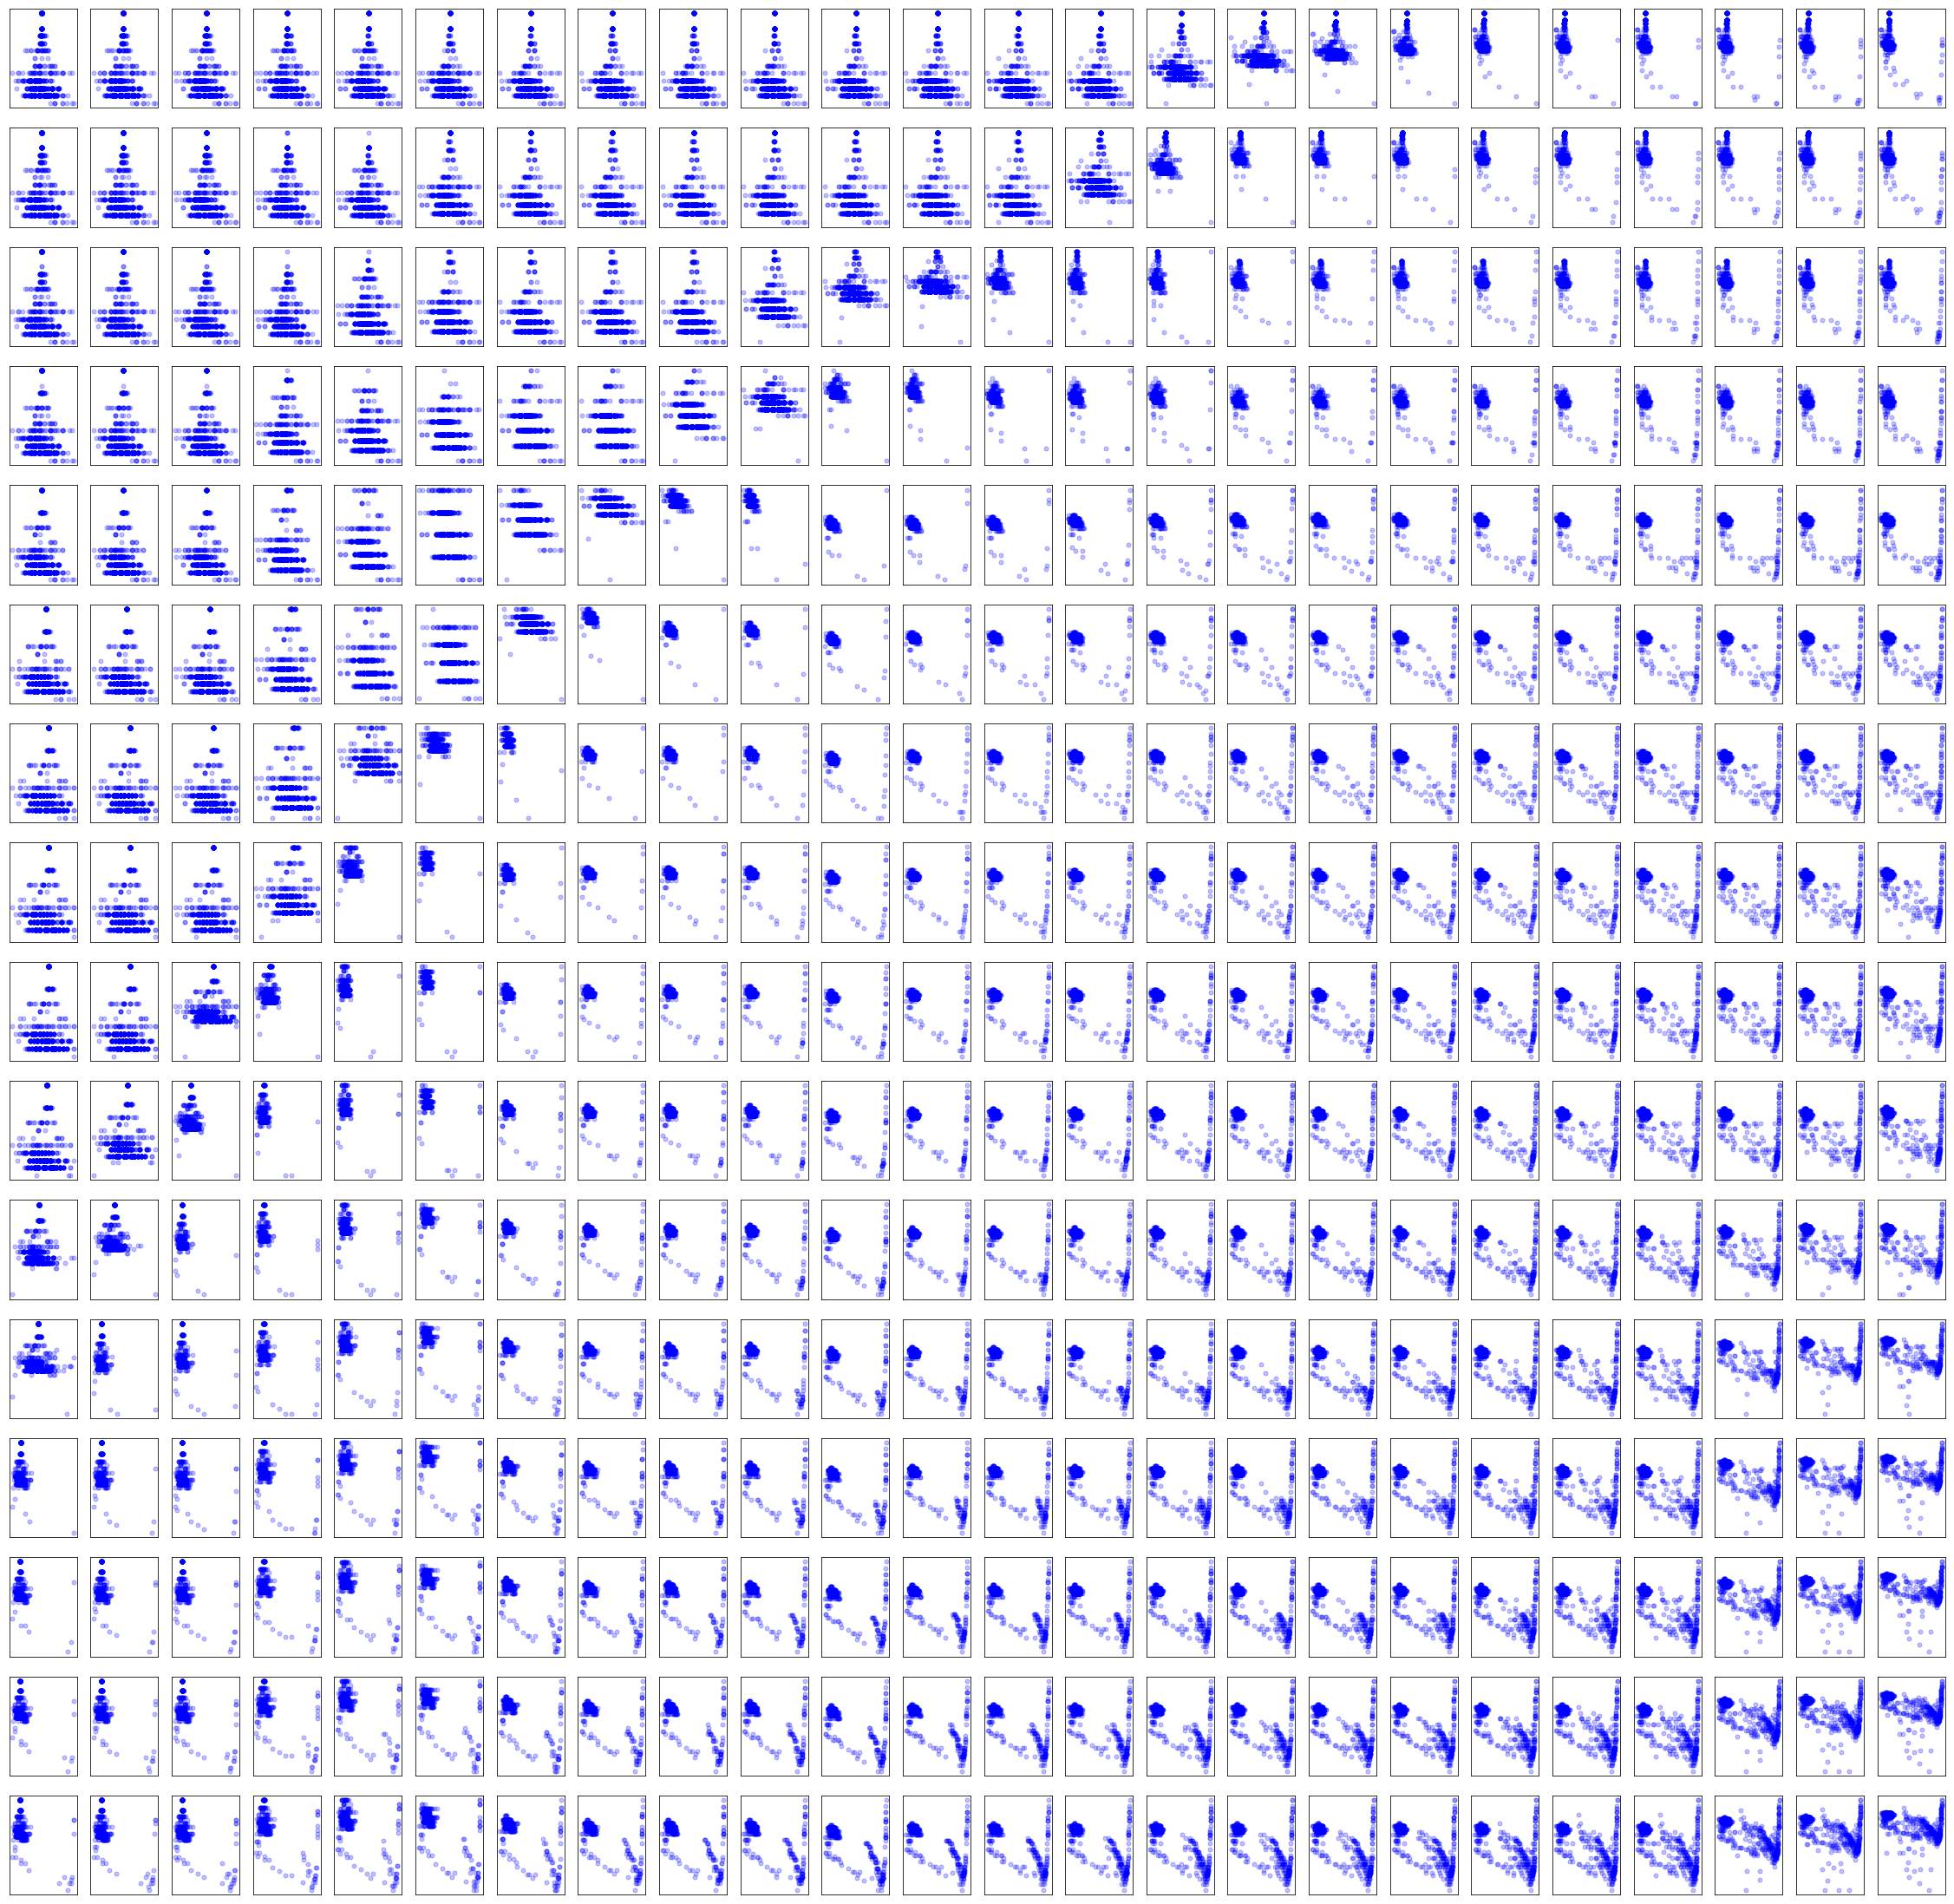

In [5]:
height, width, z = im.shape
plot_width = int(width / block_size)
plot_height = int(height / block_size)

corrU = np.zeros((plot_height, plot_width))

plt.figure(figsize=(40,40))
yy = 0
zz = 1
for y in range(0, height, block_size):
    xx = 0
    for x in range(0, width, block_size):
        bY = im[yy:yy+block_size,xx:xx+block_size,0].ravel()
        bU = im[yy:yy+block_size,xx:xx+block_size,1].ravel()
        
        avgY = np.mean(bY)
        avgU = np.mean(bU)
        
        dY = bY - avgY
        dU = bU - avgU
        
        corr = np.corrcoef(dY, dU)
        corrU[yy,xx] = abs(corr[0,1])
        
        plt.subplot(plot_height,plot_width, zz)
        plt.scatter(dY, dU, c="blue", alpha=0.25, s=25)
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])
        xx = xx + 1
        zz = zz + 1
    yy = yy + 1

## dY vs dV

For each block in the image, we plot the zero-mean Y values along the X axis and the zero-mean V values along the Y axis.

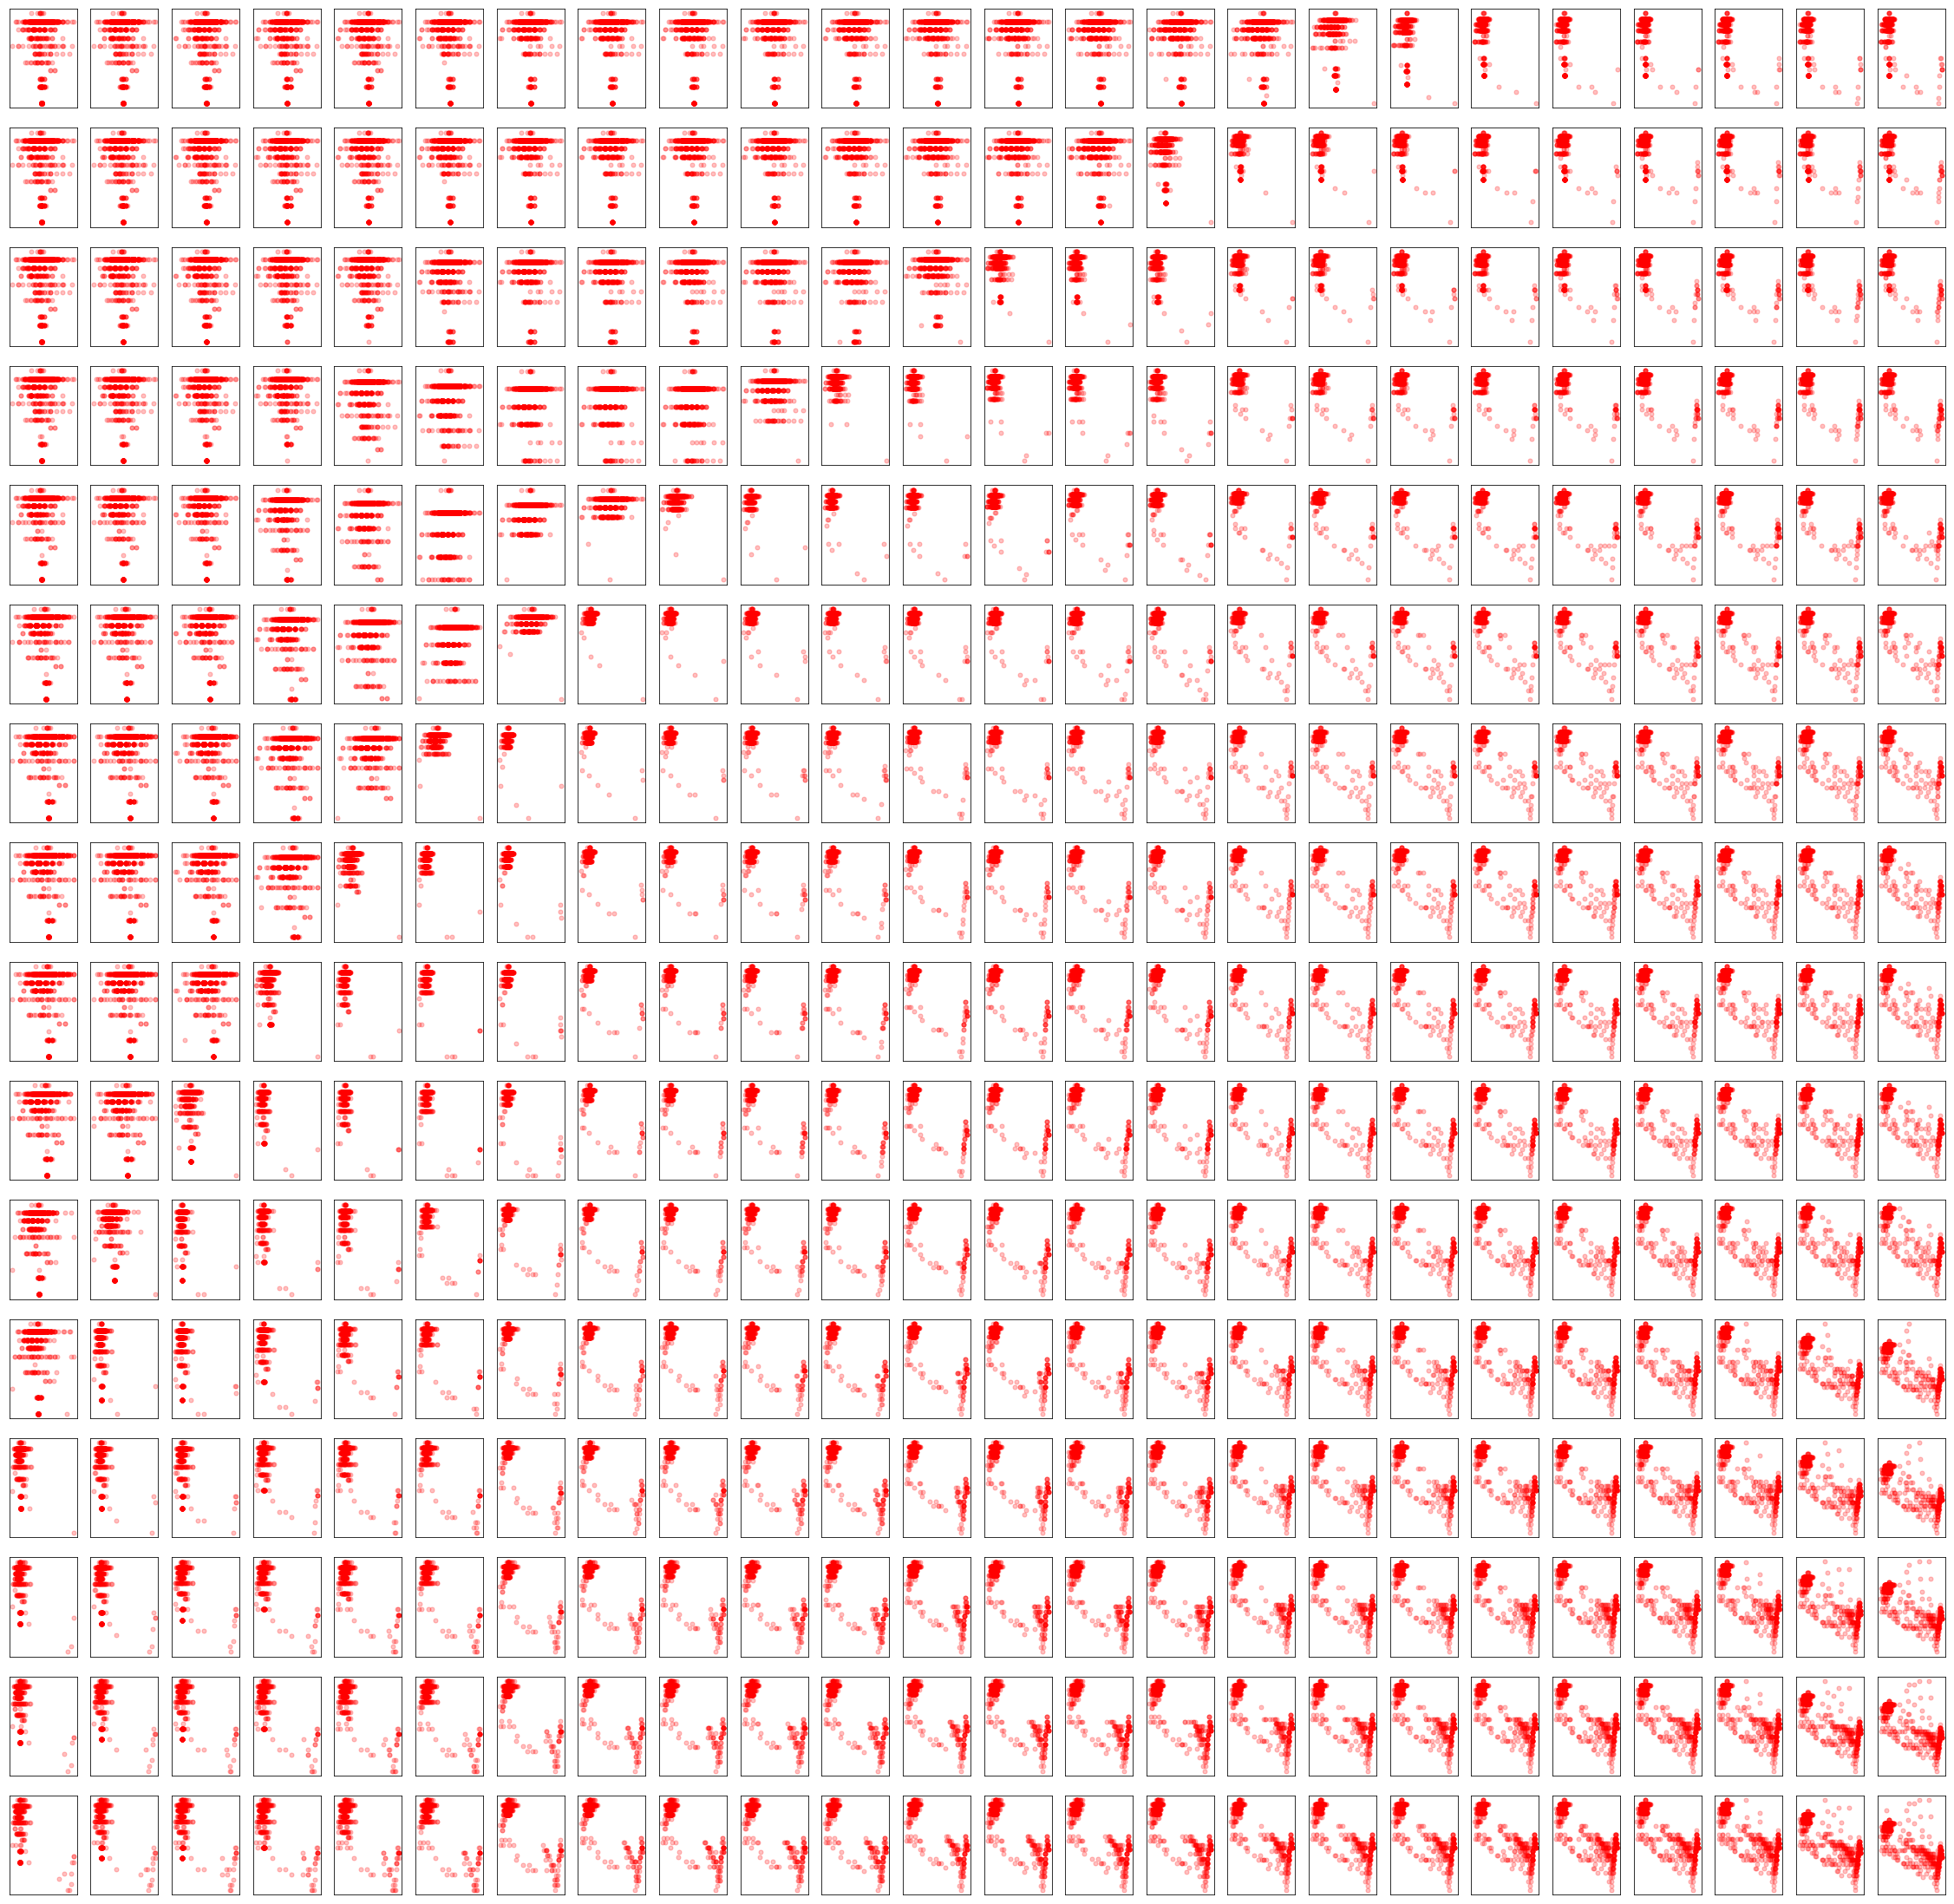

In [7]:
corrV = np.zeros((plot_height, plot_width))

plt.figure(figsize=(40,40))
yy = 0
zz = 1
for y in range(0, height, block_size):
    xx = 0
    for x in range(0, width, block_size):
        bY = im[yy:yy+block_size,xx:xx+block_size,0].ravel()
        bV = im[yy:yy+block_size,xx:xx+block_size,2].ravel()
        
        avgY = np.mean(bY)
        avgV = np.mean(bV)
        
        dY = bY - avgY
        dV = bV - avgV
        
        corr = np.corrcoef(dY, dV)
        corrV[yy,xx] = abs(corr[0,1])
        
        plt.subplot(plot_height,plot_width, zz)
        plt.scatter(dY, dV, c="red", alpha=0.25, s=25)
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])
        xx = xx + 1
        zz = zz + 1
    yy = yy + 1

## Correlation Histogram

The following histogram presents the absolute correlation coefficients for both chroma planes. From this histogram we can conclude that, when compared to chroma and luma](https://github.com/luctrudeau/CfL-Analysis/blob/master/notebooks/exploratory/0.01-luctrudeau-ChromaAndLuma.ipynb) experiment, zero-mean values don't change the correlation between luma and chroma.

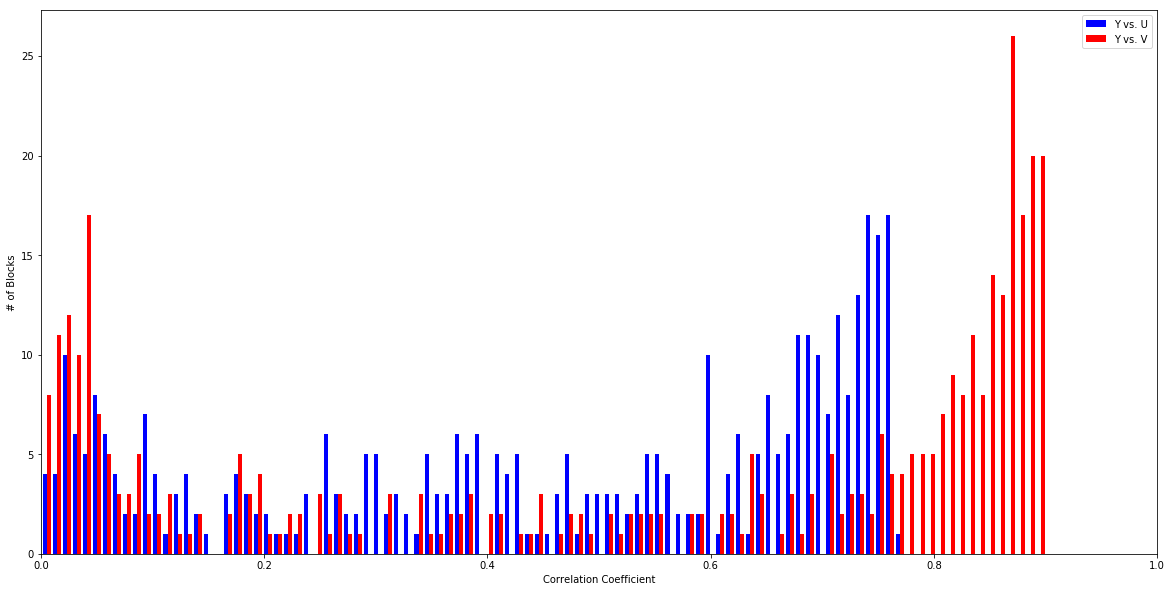

In [17]:
plt.figure(figsize=(20,10))
plt.hist((corrU.ravel(), corrV.ravel()), 100, color=['blue', 'red'])
plt.gca().set_xlim([0, 1]);
plt.xlabel("Correlation Coefficient")
plt.ylabel("# of Blocks");
plt.legend(['Y vs. U', 'Y vs. V']);

## Correlation Boxplot

The following boxplot shows the minimum, first quartile, median, third quartile and the maximum absolute correlation coefficient.

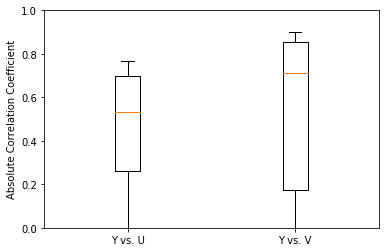

In [14]:
plt.boxplot((corrU.ravel(), corrV.ravel()), labels=['Y vs. U','Y vs. V']);
plt.gca().set_ylim([0, 1]);
plt.ylabel("Absolute Correlation Coefficient");